GP_regression.,value,constraints,priors
std_periodic.variance,1.0,+ve,
std_periodic.period,0.022727272727272728,+ve,
std_periodic.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.16000000000000003,+ve fixed,


-6702281584.312518

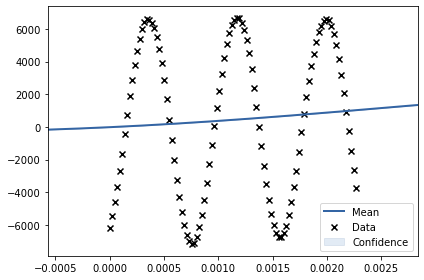

In [11]:

import numpy as np
import GPy
import matplotlib as plt
from gaussian_processes_util import plot_gp
import scipy.io.wavfile as wav


#TODO make my own GPy kernel following the rules laid out in the docs


noise = 0.4


wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/whistle_1320.wav'
sample_rate, data = wav.read(wav_file)

# Truncate data to make manageable
Y_train = data[:100].reshape(-1, 1)  

# Find time time length of truncated data
time_length = Y_train.shape[0] / sample_rate

# Plot times
X_train = np.linspace(0., time_length, Y_train.shape[0]).reshape(-1, 1)


rbf = GPy.kern.StdPeriodic(input_dim=1, variance=1.0, lengthscale=1.0, period=1/44)
# rbf = MoG_spectral_kernel_matrix()
gpr = GPy.models.GPRegression(X_train, Y_train, rbf)

# Fix the noise variance to known value 
gpr.Gaussian_noise.variance = noise**2
gpr.Gaussian_noise.variance.fix()


# Display optimized parameter values
display(gpr)

gpr.plot()
gpr.log_likelihood()


 /Users/josephine/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square
 /Users/josephine/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:151: RuntimeWarning:overflow encountered in square
 /Users/josephine/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:divide by zero encountered in divide
 /Users/josephine/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:invalid value encountered in multiply
 /Users/josephine/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:overflow encountered in divide
 /Users/josephine/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarning:divide by zero encountered in divide
 /Users/josephine/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/standard_periodic.py:155: RuntimeWarni

GP_regression.,value,constraints,priors
std_periodic.variance,1.4118918529403124,+ve,
std_periodic.period,0.0024327900941877724,+ve,
std_periodic.lengthscale,0.4137843044389125,+ve,
Gaussian_noise.variance,0.16000000000000003,+ve fixed,


-435937637.39917

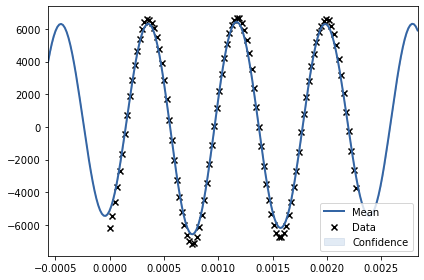

In [12]:

# Run optimization
gpr.optimize()

# Display optimized parameter values
display(gpr)

gpr.plot()

gpr.log_likelihood()